In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Text(0.5, 1.0, 'Original signal')

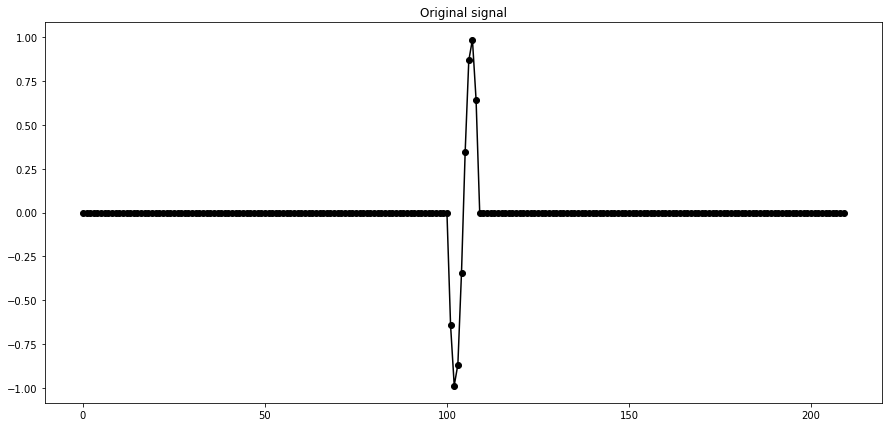

In [10]:
# create a simple signal
raw_signal = np.concatenate((np.zeros(100), np.cos(np.linspace(np.pi / 2, 5 * np.pi / 2, 10)), np.zeros(100)), axis=0)
n_signal = len(raw_signal)

# plot it and its power spectrum
plt.figure(figsize=(15, 7))
plt.plot(raw_signal, 'ko-')
plt.title('Original signal')

Text(0.5, 1.0, 'Frequency-domain signal representation')

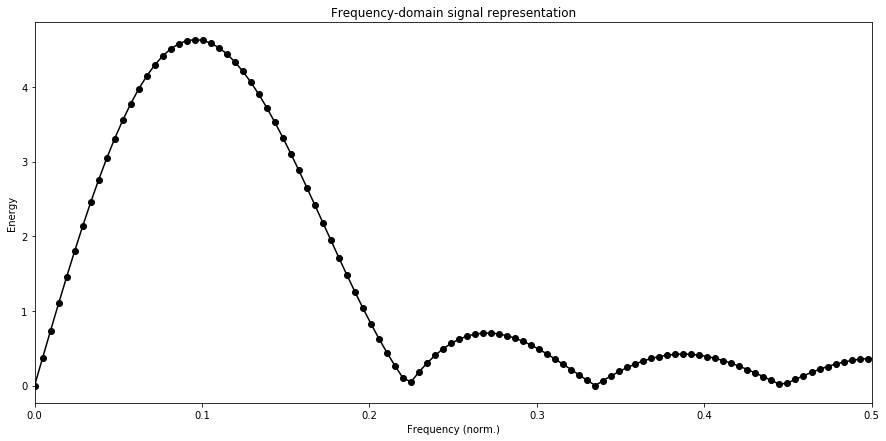

In [11]:

signal_fft = np.abs(np.fft.fft(raw_signal))
hz_axis = np.linspace(0, 1, n_signal)

plt.figure(figsize=(15, 7))
plt.plot(hz_axis, signal_fft, 'ko-')
plt.xlim([0, 0.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency-domain signal representation')

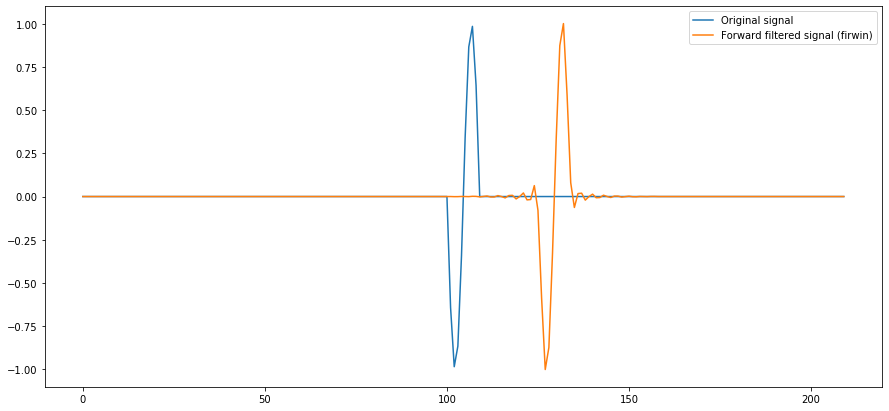

In [12]:
## apply a low-pass causal filter

# note: frequency listed as fraction of Nyquist (not sampling rate!)
filtering_kernel = signal.firwin(51, .6)
# 1 means that no coefficient_A is used (as it is FIR, not IIR)
filtered_signal = signal.lfilter(filtering_kernel, 1, raw_signal)

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Original signal')
plt.plot(filtered_signal, label='Forward filtered signal (firwin)')
plt.legend()

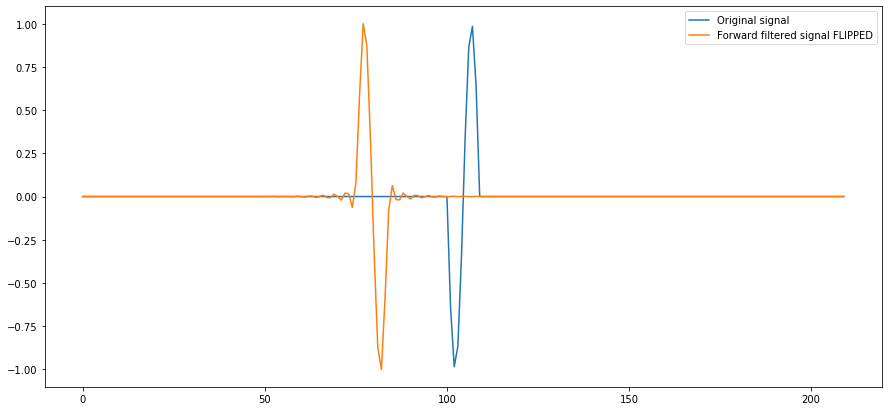

In [14]:
# flip the signal backwards
filtered_signal_flipped = filtered_signal[::-1]

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Original signal')
plt.plot(filtered_signal_flipped, label='Forward filtered signal FLIPPED')
plt.legend()

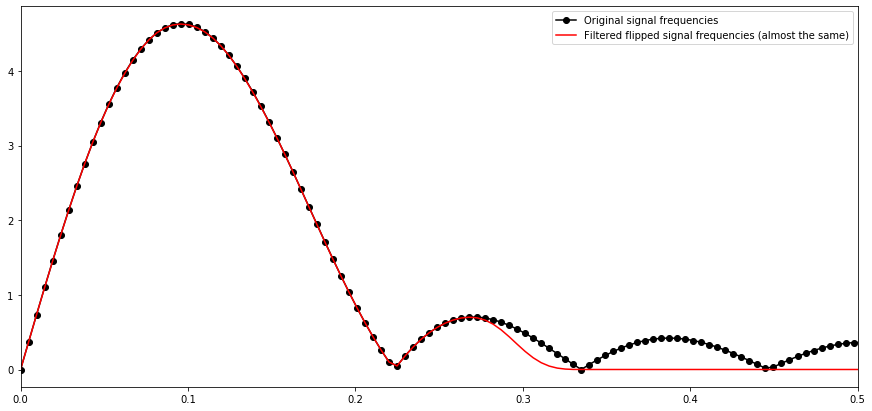

In [15]:
# and show its spectrum
plt.figure(figsize=(15, 7))
plt.plot(np.linspace(0, 1, n_signal), np.abs(np.fft.fft(raw_signal)), 'ko-', label='Original signal frequencies')
plt.plot(np.linspace(0, 1, n_signal), np.abs(np.fft.fft(filtered_signal_flipped)), 'r', 
         label='Filtered flipped signal frequencies (almost the same)')
plt.xlim([0, .5])
plt.legend()

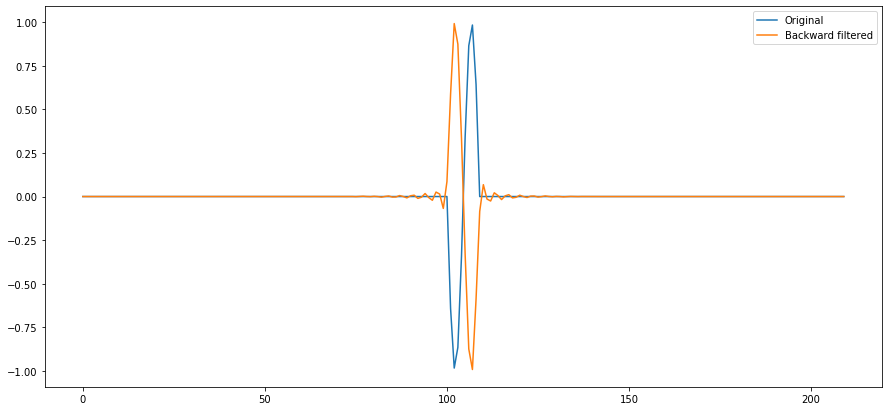

In [16]:
# filter the flipped signal
filtered_signal_flipped_filtered = signal.lfilter(filtering_kernel, 1, filtered_signal_flipped)

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Original')
plt.plot(filtered_signal_flipped_filtered, label='Backward filtered')
plt.legend()

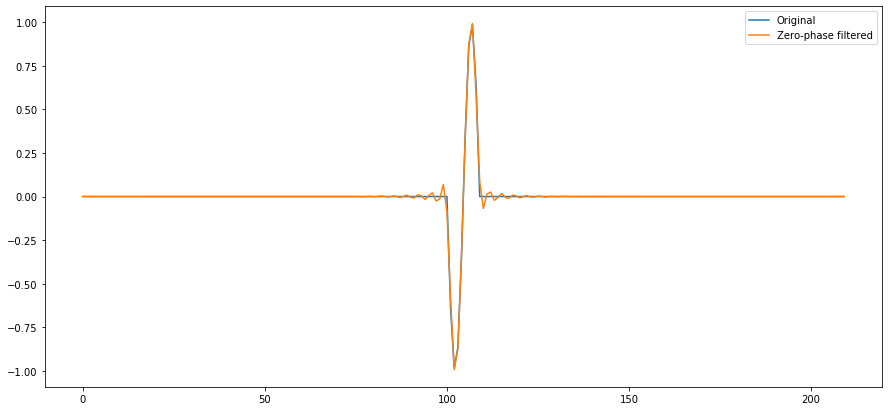

In [17]:
# finally, flip the double-filtered signal
filtered_signal_flipped_filtered_flipped = filtered_signal_flipped_filtered[::-1]

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Original')
plt.plot(filtered_signal_flipped_filtered_flipped, label='Zero-phase filtered')
plt.legend()

# Using built in function to perform zero phase shift

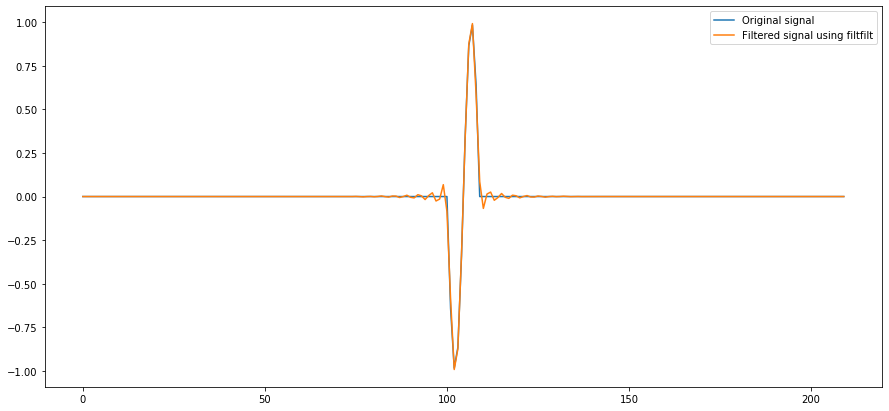

In [20]:
# Using built in function to perform zero phase shift
filtered_signal_builtin = signal.filtfilt(filtering_kernel, 1, raw_signal)
plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Original signal')
plt.plot(filtered_signal_builtin, label='Filtered signal using filtfilt')
plt.legend()